MC Q-Value estimation of (17, 6, 0) 10000/10000	


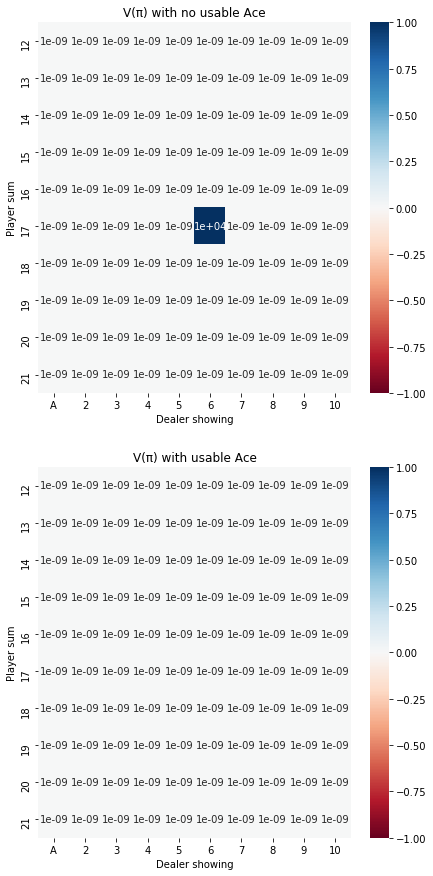

MC Q-Value estimation of (17, 6, 0) 100000/100000	


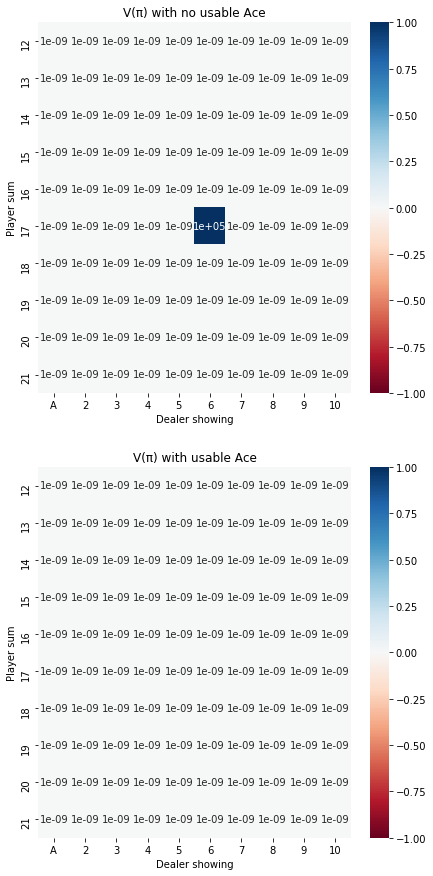

In [1]:
# MIT License

# Copyright (c) 2020 Eduardo Pignatelli

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.


from blackjack import Blackjack
import numpy as np
import random


STATE = (17, 6, 0)


def q_estimation(env, state, iterations=10000, first_visit=True):
    counts = np.ones_like(env.values) * 1e-9
    for k in range(iterations):
        # run episode
        print("MC Q-Value estimation of {} {}/{}\t".format(state, k + 1, iterations), end="\r")
        obs, done = state, False
        while not done:
            starting_state = obs
            obs, reward, done = env.step(random.random() > 0.5)
            # print(env, obs, reward, done)
            if not (first_visit and counts[starting_state] == 0):
                env.values[starting_state] += reward
            counts[starting_state] += 1
            obs = state
    print()
    return counts


if __name__ == "__main__":
    # default policy
    policy = np.ones((32, 11, 2))  # always hits
    policy[20:] = 0  # stick if score is above 20

    # policy iteration, 10k iterations
    env = Blackjack()
    env.values = q_estimation(env, STATE, 10000)
    env.render()

    # policy iteration, 500k iterations
    env2 = Blackjack()
    env2.values = q_estimation(env2, STATE, 100000)
    env2.render()
